<a href="https://colab.research.google.com/github/Vinaysh259/SOLA_Implementation/blob/master/MULTI_LABEL_IMPLEMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

**bold**

In [0]:
data_raw = pd.read_csv("train_data_binary.csv")
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

test_data = pd.read_csv("test_data_binary.csv")
#test_data.shape

In [9]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 4856
Number of columns in data = 12




**Sample data:**

,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
0,0,0,0,0,0,0,0,0,0,0,1,LOVED THE HAMPTON INN SEAPORT!!!!!!!!!!!!!!!!!!
1,0,0,0,0,0,0,0,0,0,1,0,Just returned from a 3 night stay.
2,0,0,0,0,0,0,0,0,0,0,1,This is a FABULOUS hotel.
3,0,0,0,0,0,0,0,0,1,0,0,"The front desk staff, the doormen, the breakfa..."
4,0,0,0,0,0,0,0,1,0,0,0,The room was fabulous too.


In [10]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

BUILDING       0
VALUE          0
BUSINESS       0
CHECKIN        0
LOCATION       0
FOOD           0
CLEANLINESS    0
ROOMS          0
SERVICE        0
NOTRELATED     0
OTHER          0
SEGMENTS       0
dtype: int64


In [11]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  4856
Number of clean comments =  1105
Number of comments with labels = 3751


In [12]:

rowSums = test_data.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(test_data))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(test_data)-clean_comments_count))

Total number of comments =  1485
Number of clean comments =  295
Number of comments with labels = 1190


In [13]:
categories = list(data_raw.columns.values)
categories = categories[:11]
print(categories)

categories1 = list(test_data.columns.values)
categories1 = categories1[:11]

['BUILDING', 'VALUE', 'BUSINESS', 'CHECKIN', 'LOCATION', 'FOOD', 'CLEANLINESS', 'ROOMS', 'SERVICE', 'NOTRELATED', 'OTHER']


In [14]:
# Calculating number of comments in each category for training data

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,BUILDING,226
1,VALUE,257
2,BUSINESS,24
3,CHECKIN,142
4,LOCATION,451
5,FOOD,401
6,CLEANLINESS,211
7,ROOMS,751
8,SERVICE,681
9,NOTRELATED,376


In [15]:
# Calculating number of comments in each category in test data

counts = []
for category in categories1:
    counts.append((category, test_data[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,BUILDING,64
1,VALUE,75
2,BUSINESS,7
3,CHECKIN,46
4,LOCATION,149
5,FOOD,117
6,CLEANLINESS,71
7,ROOMS,220
8,SERVICE,210
9,NOTRELATED,148


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


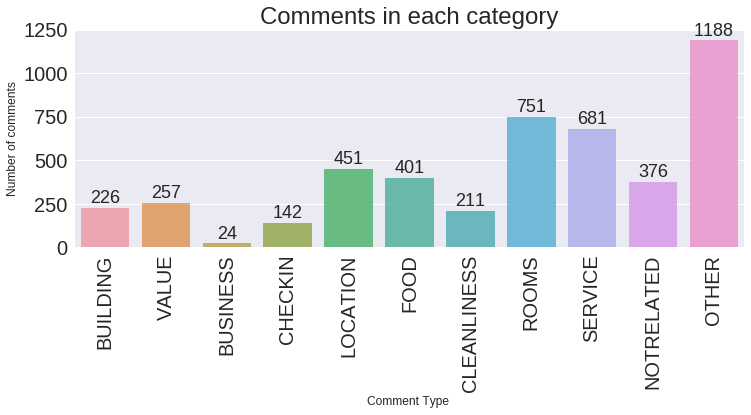

In [16]:
sns.set(font_scale = 2)
plt.figure(figsize=(12,4))

ax= sns.barplot(categories, data_raw.iloc[:,:11].sum().values,alpha = 0.8)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=12)
plt.xlabel('Comment Type ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,:11].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.xticks(rotation=90)
plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


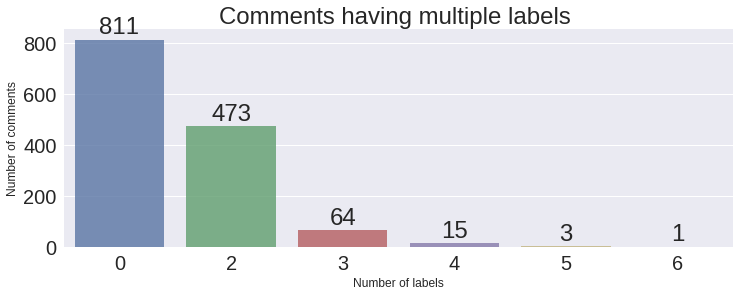

In [17]:
rowSums = data_raw.iloc[:,:11].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(12,4))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values,alpha = 0.8)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=12)
plt.xlabel('Number of labels', fontsize=12)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

#plt.xticks(rotation=90)    
plt.show()

Comments having multiple labels in the test data test  


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


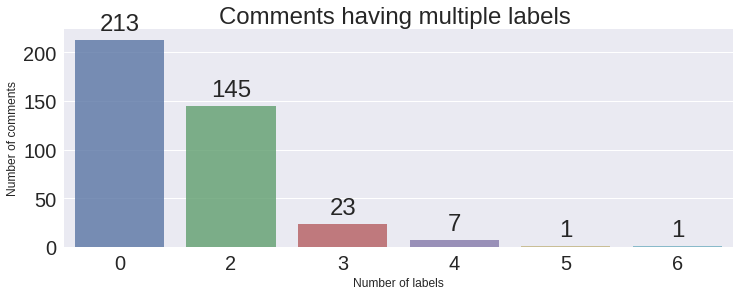

In [18]:
print("Comments having multiple labels in the test data test  ")

rowSums = test_data.iloc[:,:11].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(12,4))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values,alpha = 0.8)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=12)
plt.xlabel('Number of labels', fontsize=12)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

#plt.xticks(rotation=90)    
plt.show()


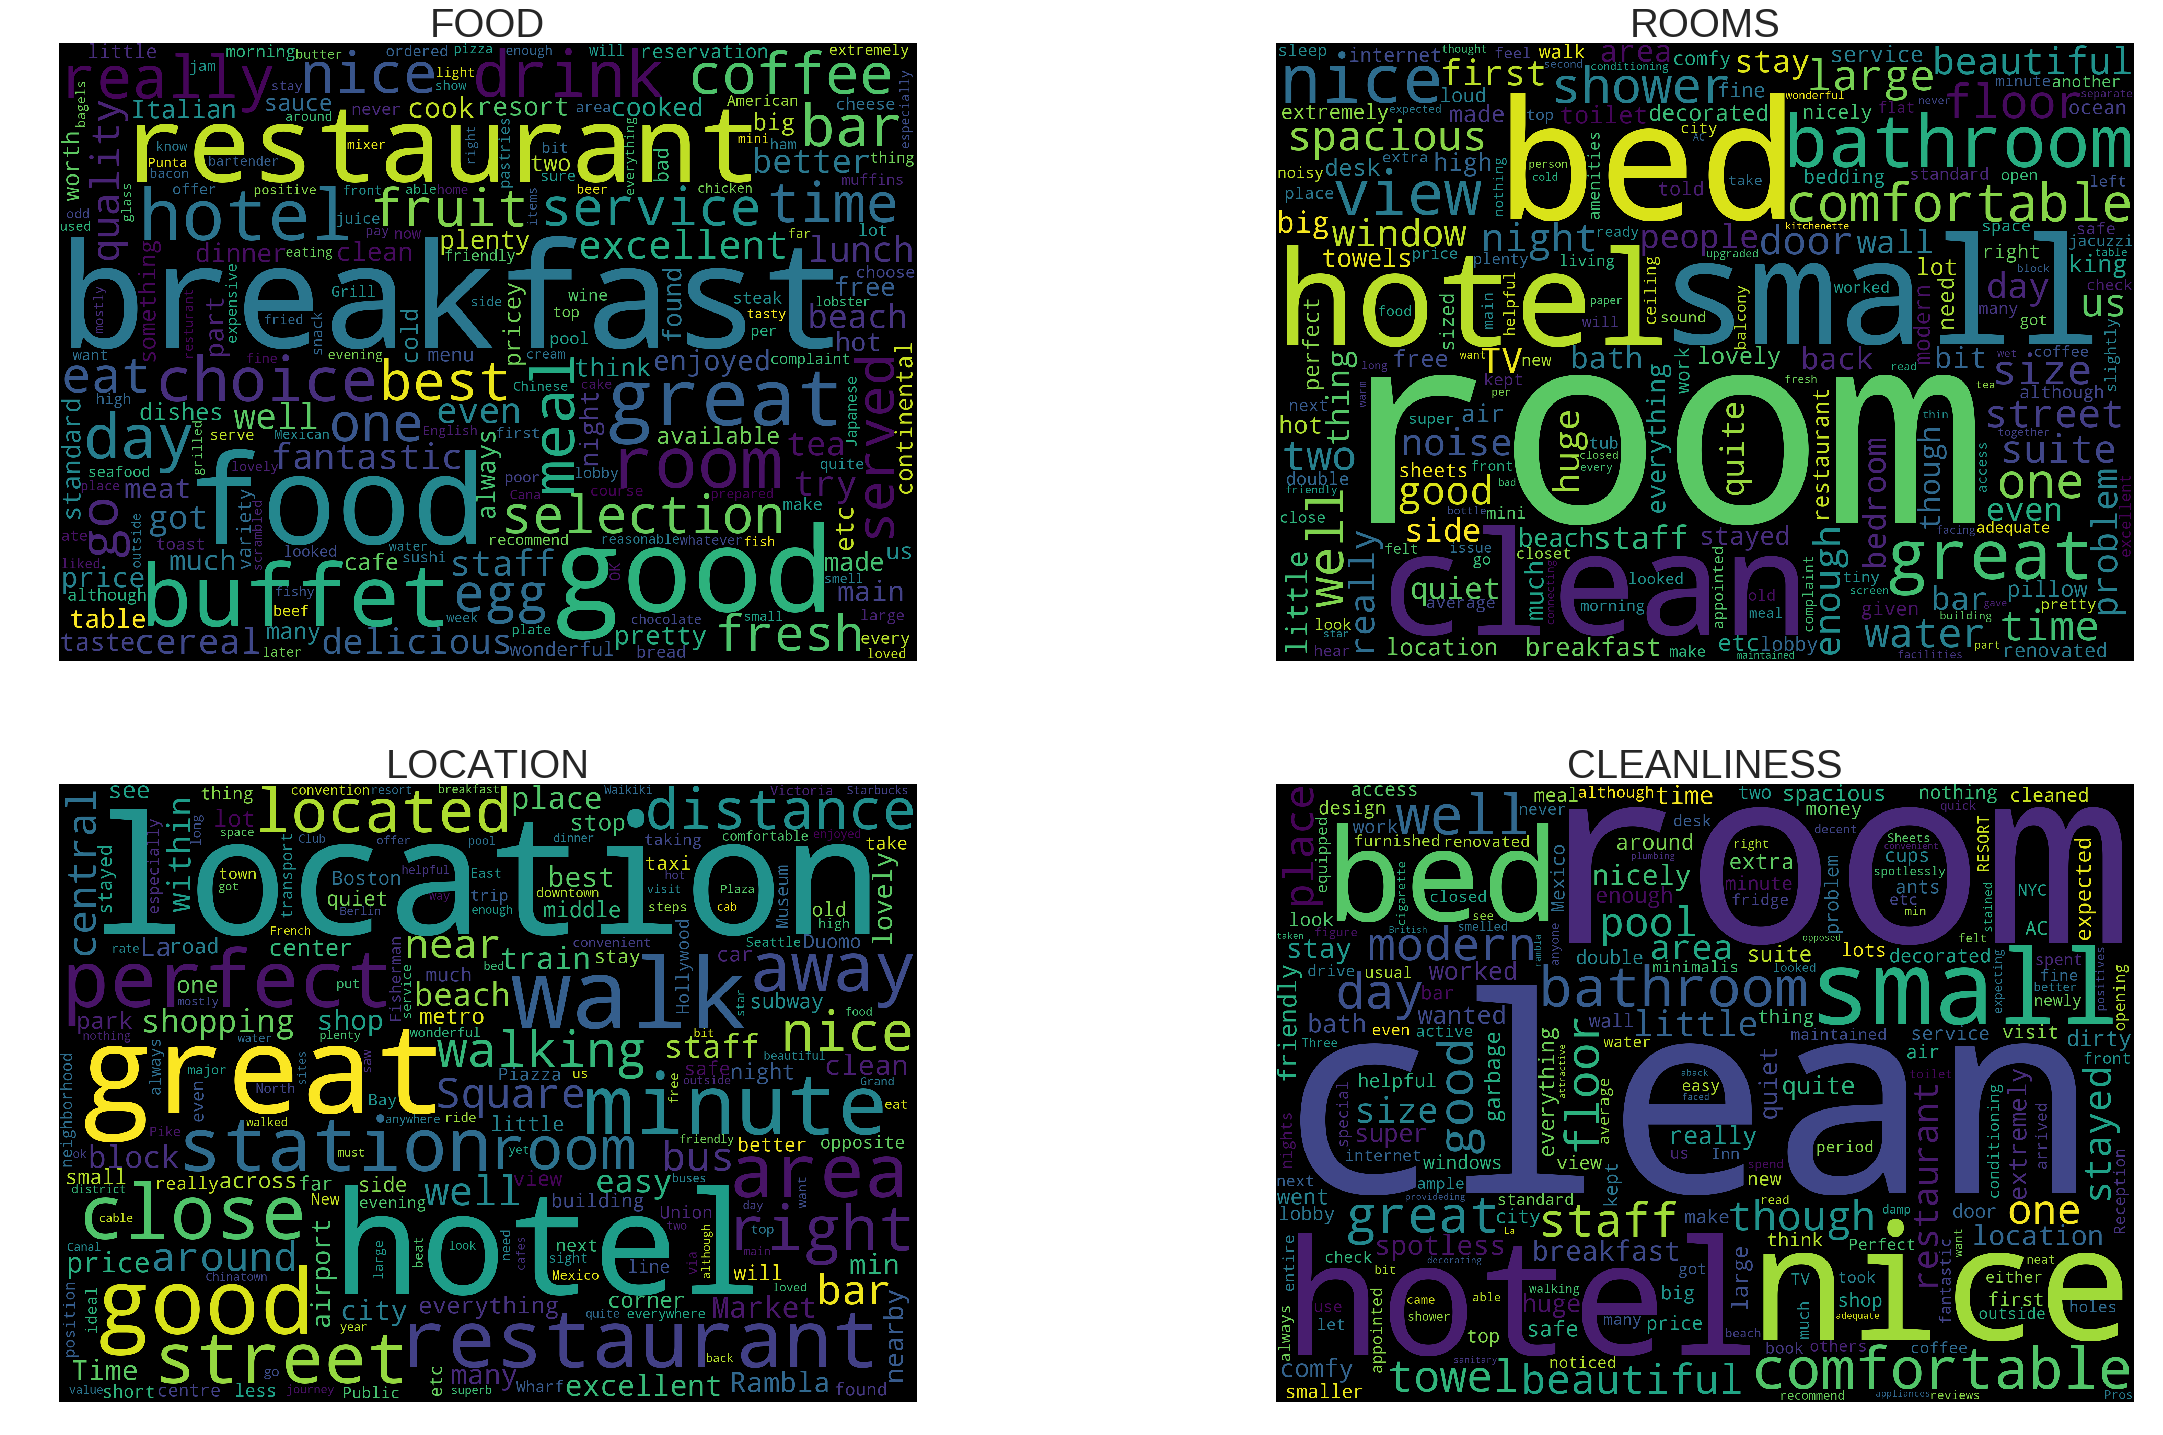

In [14]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# FOOD
subset = data_raw[data_raw.FOOD==1]
text = subset.SEGMENTS.values
cloud_FOOD = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 2, 1)
plt.axis('off')
plt.title("FOOD",fontsize=40)
plt.imshow(cloud_FOOD)

# ROOMS
subset = data_raw[data_raw.ROOMS==1]
text = subset.SEGMENTS.values
cloud_ROOMS = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 2, 2)
plt.axis('off')
plt.title("ROOMS",fontsize=40)
plt.imshow(cloud_ROOMS)


# LOCATION
subset = data_raw[data_raw.LOCATION==1]
text = subset.SEGMENTS.values
cloud_LOCATION = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title("LOCATION",fontsize=40)
plt.imshow(cloud_LOCATION)


# CLEANLINESS
subset = data_raw[data_raw.CLEANLINESS==1]
text = subset.SEGMENTS.values
cloud_CLEANLINESS = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 2, 4)
plt.axis('off')
plt.title("CLEANLINESS",fontsize=40)
plt.imshow(cloud_CLEANLINESS)


plt.show()



In [20]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=4856)]
data.shape


(4856, 12)

In [21]:
data1 = test_data
data1 = test_data.loc[np.random.choice(test_data.index, size=1485)]
data1.shape

(1485, 12)

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [0]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [24]:
data['SEGMENTS'] = data['SEGMENTS'].str.lower()
data['SEGMENTS'] = data['SEGMENTS'].apply(cleanHtml)
data['SEGMENTS'] = data['SEGMENTS'].apply(cleanPunc)
data['SEGMENTS'] = data['SEGMENTS'].apply(keepAlpha)
data.head()

,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
1760,0,0,0,0,0,0,0,0,0,0,1,expected better stayed with my wife and two te...
2590,0,0,0,0,0,1,0,0,0,0,0,lunch buffet not enough selection
1673,0,0,0,1,0,0,0,0,0,1,0,in the end they helped me find another room fo...
2146,0,0,0,0,0,0,0,0,1,0,0,we also asked for extra water you have to use ...
4772,0,0,0,0,1,0,0,0,0,0,0,we had a room suite in the south point very c...


In [25]:
data1['SEGMENTS'] = data1['SEGMENTS'].str.lower()
data1['SEGMENTS'] = data1['SEGMENTS'].apply(cleanHtml)
data1['SEGMENTS'] = data1['SEGMENTS'].apply(cleanPunc)
data1['SEGMENTS'] = data1['SEGMENTS'].apply(keepAlpha)
data1.head()

,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
495,0,0,0,0,1,0,0,0,0,0,0,tucked into a quiet neighborhood the minute ...
527,0,0,0,0,0,0,0,0,0,0,1,no way you can trust what you order is what yo...
381,0,0,0,0,0,0,0,0,0,0,1,yes it is very trendy
48,0,0,0,0,1,0,0,0,0,0,0,we had a gorgeous view of mt rainier out one side
556,0,0,0,0,0,0,0,0,1,0,0,every member of the staff bent over backwards ...


In [26]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['SEGMENTS'] = data['SEGMENTS'].apply(removeStopWords)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
1760,0,0,0,0,0,0,0,0,0,0,1,expected better stayed wife teenage childr...
2590,0,0,0,0,0,1,0,0,0,0,0,lunch buffet enough selection
1673,0,0,0,1,0,0,0,0,0,1,0,end helped find another room night nearb...
2146,0,0,0,0,0,0,0,0,1,0,0,asked extra water use bottled water dri...
4772,0,0,0,0,1,0,0,0,0,0,0,room suite south point close awesome ...


In [27]:
data1['SEGMENTS'] = data1['SEGMENTS'].apply(removeStopWords)
data1.head()

,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
495,0,0,0,0,1,0,0,0,0,0,0,tucked quiet neighborhood minute walk ...
527,0,0,0,0,0,0,0,0,0,0,1,way trust order get
381,0,0,0,0,0,0,0,0,0,0,1,yes trendy
48,0,0,0,0,1,0,0,0,0,0,0,gorgeous view mt rainier side
556,0,0,0,0,0,0,0,0,1,0,0,every member staff bent backwards make us ...


In [28]:
########   STEMMING IS USEFULL??????? ######
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['SEGMENTS'] = data['SEGMENTS'].apply(stemming)
data.head()

,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
1760,0,0,0,0,0,0,0,0,0,0,1,expect better stay wife teenag children night
2590,0,0,0,0,0,1,0,0,0,0,0,lunch buffet enough select
1673,0,0,0,1,0,0,0,0,0,1,0,end help find anoth room night nearbi perhap w...
2146,0,0,0,0,0,0,0,0,1,0,0,ask extra water use bottl water drink brush te...
4772,0,0,0,0,1,0,0,0,0,0,0,room suit south point close awesom water park ...


In [29]:
data1['SEGMENTS'] = data1['SEGMENTS'].apply(stemming)
data1.head()

,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
495,0,0,0,0,1,0,0,0,0,0,0,tuck quiet neighborhood minut walk hotel day g...
527,0,0,0,0,0,0,0,0,0,0,1,way trust order get
381,0,0,0,0,0,0,0,0,0,0,1,yes trendi
48,0,0,0,0,1,0,0,0,0,0,0,gorgeous view mt rainier side
556,0,0,0,0,0,0,0,0,1,0,0,everi member staff bent backward make us comfort


In [31]:
############   NOT NEEDED ############

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(3399, 12)
(1457, 12)


In [32]:
train_text = train['SEGMENTS']
test_text = test['SEGMENTS']
test_text.head()

1491                 driver take place place reason price
3023    dont miss nearbi palac kitchen restaur doughnu...
2293                                            thoma etc
4295                 room clean recent refurbish inexpens
835     offer handicap access room spacious locat ente...
Name: SEGMENTS, dtype: object

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [35]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['SEGMENTS'], axis=1)
print(x_train.shape)
print(y_train.shape)
x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['SEGMENTS'], axis=1)
print(x_test.shape)
print(y_test.shape)

(3399, 17517)
(3399, 11)
(1457, 17517)
(1457, 11)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [38]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('Processing {} SEGMENTS...'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    
    
    print("\n")
   

Processing BUILDING SEGMENTS...
Test accuracy is 0.9622512010981469


Processing VALUE SEGMENTS...
Test accuracy is 0.9505833905284832


Processing BUSINESS SEGMENTS...
Test accuracy is 0.9958819492107069


Processing CHECKIN SEGMENTS...
Test accuracy is 0.9711736444749485


Processing LOCATION SEGMENTS...
Test accuracy is 0.9217570350034318


Processing FOOD SEGMENTS...
Test accuracy is 0.9169526424159231


Processing CLEANLINESS SEGMENTS...
Test accuracy is 0.9643102264927934


Processing ROOMS SEGMENTS...
Test accuracy is 0.8743994509265615


Processing SERVICE SEGMENTS...
Test accuracy is 0.8737131091283459


Processing NOTRELATED SEGMENTS...
Test accuracy is 0.9299931365820179


Processing OTHER SEGMENTS...
Test accuracy is 0.7927247769389156


CPU times: user 93.7 ms, sys: 40.8 ms, total: 134 ms
Wall time: 2.21 s


In [39]:
%%time

!pip install scikit-multilearn
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)
#print(y_test.shape)
#print(predictions.shape)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")
report = classification_report(y_test, predictions)
print(report)

Accuracy =  0.6163349347975292


              precision    recall  f1-score   support

           0       0.38      0.65      0.48        55
           1       0.39      0.60      0.47        73
           2       0.07      0.17      0.10         6
           3       0.39      0.65      0.49        43
           4       0.55      0.69      0.61       147
           5       0.48      0.64      0.55       125
           6       0.42      0.68      0.52        57
           7       0.62      0.79      0.70       234
           8       0.59      0.77      0.67       218
           9       0.44      0.56      0.49       102
          10       0.69      0.76      0.72       376

   micro avg       0.55      0.71      0.62      1436
   macro avg       0.45      0.63      0.53      1436
weighted avg       0.56      0.71      0.63      1436
 samples avg       0.56      0.60      0.56      1436

CPU times: user 17.9 s, sys: 968 ms, total: 18.9 s
Wall time: 23.8 s


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [0]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [41]:
%%time

# initialize classifier chains multi-label classifier
#classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data

from sklearn.ensemble import RandomForestClassifier

# initialize LabelPowerset multi-label classifier with a RandomForest
classifier = ClassifierChain(
    classifier = RandomForestClassifier(n_estimators=100),
    require_dense = [False, True]
)
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")
report = classification_report(y_test, predictions)
print(report)

Accuracy =  0.6485929993136582


              precision    recall  f1-score   support

           0       1.00      0.62      0.76        55
           1       1.00      0.44      0.61        73
           2       1.00      0.17      0.29         6
           3       1.00      0.65      0.79        43
           4       0.98      0.65      0.78       147
           5       0.98      0.48      0.65       125
           6       1.00      0.67      0.80        57
           7       0.96      0.70      0.81       234
           8       0.99      0.71      0.83       218
           9       1.00      0.45      0.62       102
          10       0.98      0.58      0.73       376

   micro avg       0.98      0.61      0.75      1436
   macro avg       0.99      0.56      0.70      1436
weighted avg       0.98      0.61      0.74      1436
 samples avg       0.51      0.50      0.50      1436

CPU times: user 49.6 s, sys: 55.5 ms, total: 49.6 s
Wall time: 49.6 s


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [0]:
#USING LABEL POWER SET
from skmultilearn.problem_transform import LabelPowerset

In [44]:
%%time

# initialize label powerset multi-label classifier
#classifier = LabelPowerset(LogisticRegression())

from sklearn.ensemble import RandomForestClassifier

# initialize LabelPowerset multi-label classifier with a RandomForest
classifier = LabelPowerset(
    classifier = RandomForestClassifier(n_estimators=100),
    require_dense = [False, True]
)
# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")
report = classification_report(y_test, predictions)
print(report)


Accuracy =  0.7096774193548387


              precision    recall  f1-score   support

           0       1.00      0.62      0.76        55
           1       0.92      0.48      0.63        73
           2       1.00      0.17      0.29         6
           3       0.94      0.70      0.80        43
           4       0.92      0.79      0.85       147
           5       0.92      0.70      0.80       125
           6       0.94      0.79      0.86        57
           7       0.88      0.85      0.87       234
           8       0.95      0.76      0.85       218
           9       1.00      0.44      0.61       102
          10       0.78      0.72      0.75       376

   micro avg       0.88      0.72      0.79      1436
   macro avg       0.93      0.64      0.73      1436
weighted avg       0.89      0.72      0.79      1436
 samples avg       0.62      0.60      0.60      1436

CPU times: user 10.9 s, sys: 42 ms, total: 11 s
Wall time: 11 s


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [0]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [46]:
%%time

classifier_new = MLkNN(k=3)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")
report = classification_report(y_test, predictions_new)
print(report)

Accuracy =  0.5236787920384351


              precision    recall  f1-score   support

           0       0.89      0.60      0.72        55
           1       0.94      0.42      0.58        73
           2       1.00      0.17      0.29         6
           3       0.93      0.65      0.77        43
           4       0.91      0.54      0.68       147
           5       0.90      0.48      0.62       125
           6       0.95      0.63      0.76        57
           7       0.91      0.59      0.71       234
           8       0.68      0.63      0.66       218
           9       1.00      0.17      0.29       102
          10       0.88      0.38      0.53       376

   micro avg       0.85      0.49      0.62      1436
   macro avg       0.91      0.48      0.60      1436
weighted avg       0.88      0.49      0.61      1436
 samples avg       0.40      0.40      0.40      1436

CPU times: user 8min 10s, sys: 59.8 ms, total: 8min 11s
Wall time: 8min 11s


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [72]:
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec

# numpy
import numpy

# random
from random import shuffle

# classifier
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


TypeError: ignored

In [65]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(model, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)


TypeError: ignored